In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

There's some `order` data in this directory.  Find it, and read it into a dataframe.

In [3]:
data_path = "data/orders.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.reset_index(drop=True)
df.head(2)

,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,$4.73
1,4,FL,2010-02-07,****,7.0,NaN


<IPython.core.display.Javascript object>

Inspect the data frame with the `.info()` method.  Where do we have nans?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  213 non-null    int64  
 1   state       213 non-null    object 
 2   date        213 non-null    object 
 3   rating      187 non-null    object 
 4   units_sold  187 non-null    float64
 5   price       185 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.1+ KB


<IPython.core.display.Javascript object>

Further inspect the data frame with `.isna()` or `.isnull()`

What percentage of each column is `NaN`?

In [5]:
df.isna().sum()

product_id     0
state          0
date           0
rating        26
units_sold    26
price         28
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
df.isna().mean()  # gives us the percentage

product_id    0.000000
state         0.000000
date          0.000000
rating        0.122066
units_sold    0.122066
price         0.131455
dtype: float64

<IPython.core.display.Javascript object>

Convert the price column to numeric

In [7]:
df["price"] = df["price"].str.replace("$", "")
df["price"] = pd.to_numeric(df["price"], errors="coerce")

<IPython.core.display.Javascript object>

Using `pd.to_numeric` with the option `errors="coerce"` can create new `NaN`s. 

Redo the same missing value analysis.

In [8]:
df.isna().mean()

product_id    0.000000
state         0.000000
date          0.000000
rating        0.122066
units_sold    0.122066
price         0.131455
dtype: float64

<IPython.core.display.Javascript object>

Convert the ratings column to numeric.

In [9]:
# df["rating"] = df["rating"].apply(lambda x: len(str(x)))

<IPython.core.display.Javascript object>

In [10]:
# df["rating"] = df["rating"].str.strip().str.len()

<IPython.core.display.Javascript object>

In [11]:
ratings_map = {"*": 1, "**": 2, "***": 3, "****": 4, "*****": 5}
df["rating"] = df["rating"].replace(ratings_map)

<IPython.core.display.Javascript object>

In [12]:
df["rating"]

0      1.0
1      4.0
2      1.0
3      1.0
4      4.0
      ... 
208    5.0
209    1.0
210    2.0
211    1.0
212    4.0
Name: rating, Length: 213, dtype: float64

<IPython.core.display.Javascript object>

Convert the date column to a date datatype and sort by it

In [13]:
df["date"] = pd.to_datetime(df["date"])

<IPython.core.display.Javascript object>

In [14]:
df["date"].dt.weekday

0      4
1      6
2      6
3      4
4      2
      ..
208    6
209    2
210    4
211    1
212    5
Name: date, Length: 213, dtype: int64

<IPython.core.display.Javascript object>

Now let's address the missing values.

In practice, the 2 main ways we might handle NAs are:

* Drop them
* Fill them in with a value
  * Some people didn't mark their height on a survey, maybe we fill in with the average height reported
  * The thermeter broke so we're missing a temperature at time 4, maybe we fill it in with the average of time 3 and time 5 (linear interpolation)


Before dropping we'd like to know why the values are NA because we might be dropping valid data.  For example, you might have seen something like below on a survey:

> 10. Are you a veteran?:  &emsp;&emsp; Yes [&emsp;]&emsp;&emsp;No [&emsp;]
> 
> (only answer the following questions if you answered yes to question 10)

In this case, we should expect non-veterans to have missing values to the veteran only questions.  Other times, missing values aren't that deep and they're just missing.  For example, maybe a survey taker didn't know there was a page 2 so they left it all blank.

In practice it's very important to know how the data was collected and what a missing value indicates.

* Is there any pattern to any of the missingness?

In [15]:
df["rating"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
208    False
209    False
210    False
211    False
212    False
Name: rating, Length: 213, dtype: bool

<IPython.core.display.Javascript object>

In [16]:
# rating not missing at random, missing only for product 0
pd.crosstab(df["product_id"], df["rating"].isna()).T

product_id,0,1,2,3,4,5,6,7,8,9
rating,,,,,,,,,,
False,0,19,22,20,18,17,26,21,24,20
True,26,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [17]:
# Looks to be missing at random
pd.crosstab(df["state"], df["units_sold"].isna()).T

state,AZ,CA,FL,GA,HI,ID,NY,OR,TN
units_sold,,,,,,,,,
False,19,29,19,21,15,21,22,16,25
True,1,3,3,3,1,1,7,5,2


<IPython.core.display.Javascript object>

In [18]:
# pd.crosstab(dropna=False)

TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

<IPython.core.display.Javascript object>

In [19]:
df.isna().sum()

product_id     0
state          0
date           0
rating        26
units_sold    26
price         28
dtype: int64

<IPython.core.display.Javascript object>

We want to move forward with a dataframe that doesn't have any missing values.

* What options do we have?
* Which ones make sense for each column?
    * How do we decide which ones make sense?
    
Once these questions are answered.  Let's apply them until we have no missing values.

In [ ]:
#no obvious value
sns.distplot(df["rating"])

In [20]:
#consider the impact of losing data. here is 12%
df.isna().mean()

product_id    0.000000
state         0.000000
date          0.000000
rating        0.122066
units_sold    0.122066
price         0.131455
dtype: float64

<IPython.core.display.Javascript object>

In [21]:
df = df.dropna(subset=["rating"])
df.isna().mean()

product_id    0.000000
state         0.000000
date          0.000000
rating        0.000000
units_sold    0.112299
price         0.133690
dtype: float64

<IPython.core.display.Javascript object>

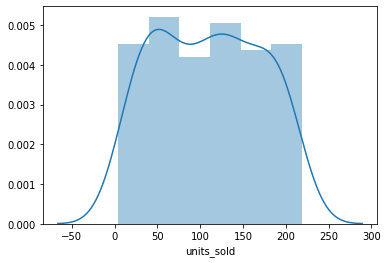

<IPython.core.display.Javascript object>

In [22]:
#no real peak
#median id probably fine
sns.distplot(df["units_sold"])

In [23]:
help(df["units_sold"].fillna)

Help on method fillna in module pandas.core.series:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[ForwardRef('Series'), NoneType] method of pandas.core.series.Series instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index'}
        Axis along which to fill missing v

<IPython.core.display.Javascript object>

In [24]:
df["units_sold"].fillna(df["units_sold"].median())

0        6.0
1        7.0
2      111.0
3        4.0
4        6.0
       ...  
208    211.0
209    111.0
210    219.0
211    219.0
212    217.0
Name: units_sold, Length: 187, dtype: float64

<IPython.core.display.Javascript object>

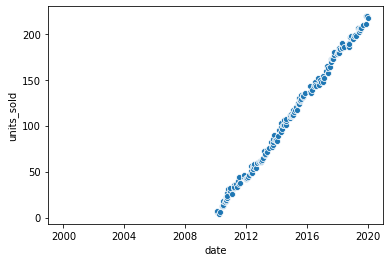

<IPython.core.display.Javascript object>

In [26]:
# consider NAs in relation to date
sns.scatterplot("date", "units_sold", data=df)
plt.show()

In [29]:
df = df.sort_values("date")
df["units_sold"] = df["units_sold"].interpolate()
df.isna().mean()

product_id    0.00000
state         0.00000
date          0.00000
rating        0.00000
units_sold    0.00000
price         0.13369
dtype: float64

<IPython.core.display.Javascript object>

In [30]:
df["price"] = df["price"].fillna(df["price"].median())

<IPython.core.display.Javascript object>

In [31]:
df.isna().mean()

product_id    0.0
state         0.0
date          0.0
rating        0.0
units_sold    0.0
price         0.0
dtype: float64

<IPython.core.display.Javascript object>